# K-Means Clustering

### Import modules 

In [8]:
from sklearn.datasets.samples_generator import make_blobs
import pandas
import numpy
import seaborn
seaborn.set(rc = {"figure.figsize":(9,7)})
seaborn.set_style("whitegrid")
import matplotlib.pyplot as plt

### Create test data 

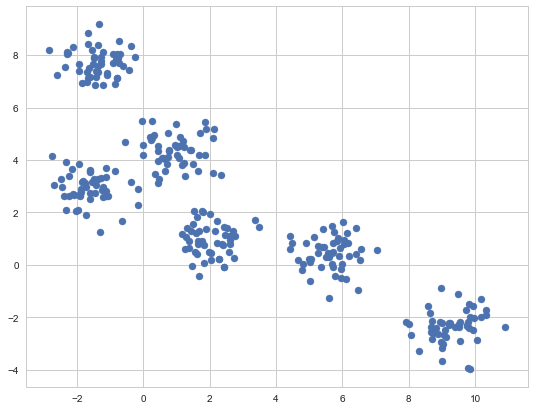

In [18]:
X, y_true = make_blobs(n_samples = 300,
                      centers = 6,
                      cluster_std = 0.60,
                      random_state = 0)

plt.scatter(X[:, 0], X[:, 1], s = 50)

### Build Kmeans model

In [19]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

### Plot Models centers, and colour code data to models assignments

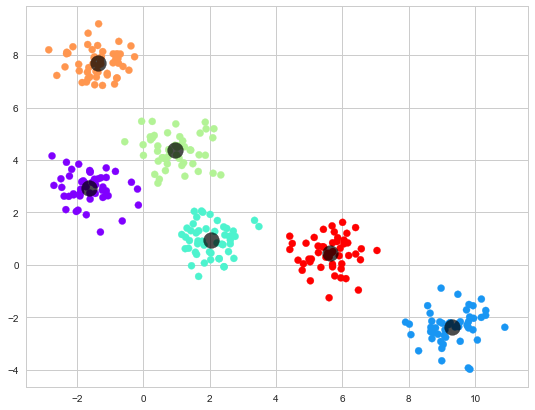

In [23]:
plt.scatter(X[:,0], X[:,1],
            c = y_kmeans,
            s = 50,
            cmap = 'rainbow')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], 
            centers[:, 1], 
            c = "black", 
            s = 250,
           alpha = 0.7)

## Kmeans limited to linear style clustering
Gaussian Mixture Models improve upon this

In [38]:
from sklearn.datasets.samples_generator import make_circles 

X, y = make_circles(100, factor=.1, noise=.1)

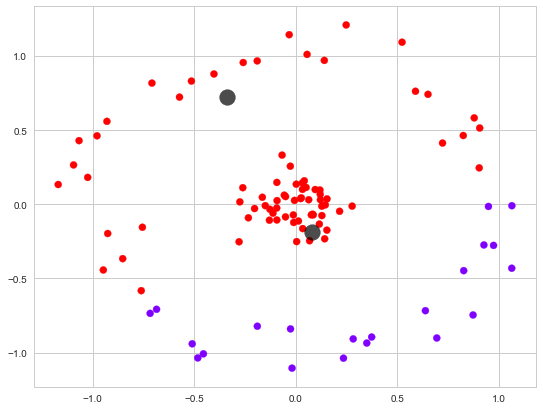

In [43]:
labels = KMeans(2,
               random_state = 0).fit_predict(X)

plt.scatter(X[:,0],
            X[:,1], 
            c = labels, 
            s = 50, 
            cmap = "rainbow")

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

centers = kmeans.cluster_centers_



plt.scatter(centers[:, 0], 
            centers[:, 1], 
            c = "black", 
            s = 250,
           alpha = 0.7)

## An example with Iris dataset

In [44]:
data = pandas.read_csv("/users/danielcorcoran/desktop/github_repos/python_nb_visualization/seaborn_official_datasets/iris.csv")

In [45]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [77]:
print("Number of actual (species) classes in the dataset: {}".format(data["species"].nunique()))

Number of actual (species) classes in the dataset: 3


In [84]:
number_clusters = 3

In [85]:
model = KMeans(n_clusters = number_clusters)

In [86]:
fit = model.fit(data[["sepal_length", "sepal_width"]])

In [87]:
y_kmeans = fit.predict(X)

In [88]:
data["kmeans_prediction"] = y_kmeans

### Plot of Kmeans predicted categories using 3 as number of clusters 

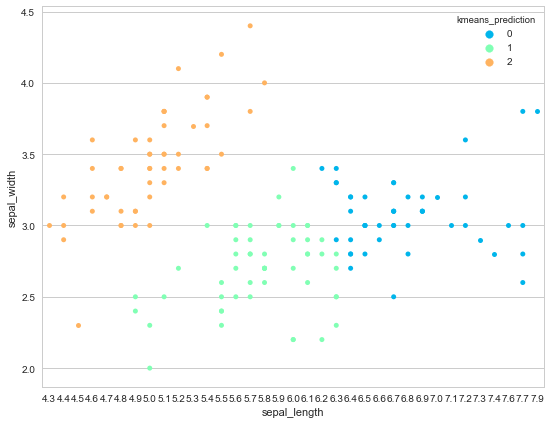

In [89]:
seaborn.stripplot(data = data,
                 x = "sepal_length",
                 y = "sepal_width",
                 hue = "kmeans_prediction",
                 palette = "rainbow")

### Plotting what the actual categorization looks like
Another weakness of KMeans is that it fails to accomodate for overlap in clusters

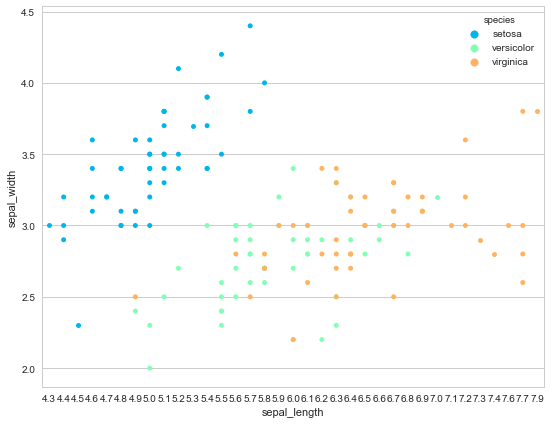

In [90]:
seaborn.stripplot(data = data,
                 x = "sepal_length",
                 y = "sepal_width",
                 hue = "species",
                 palette = "rainbow")